In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
import numpy as np
from scipy.optimize import leastsq
import pylab as plt
import math

"""
Authors: Levi Sutton, Hope Shackelford, Rico Santiago
Objective: To sort the data set, Bird Strikes Test.csv, using Apriori algorithm to sort by seasons. 
"""

'\nAuthors: Levi Sutton, Hope Shackelford, Rico Santiago\nObjective: To sort the data set, Bird Strikes Test.csv, using Apriori algorithm to sort by seasons. \n'

In [2]:
def getData():
    # Reads in file as data, which is a data frame type.
    data = pd.read_csv("Bird Strikes Test.csv",
                       usecols=['Airport: Name', 'MonthYearID', 'FlightSeason', 'Record ID', 'When: Phase of flight',
                                'Wildlife: Size',
                                'Wildlife: Species'])
    data = data.dropna(how='any', axis=0)
    return data

In [3]:
def cleaning_data():
    
    df = pd.DataFrame(getData())
    
    df1 = df.iloc[:,:] 
    indexDeer = df1[df1['Wildlife: Species'] == 'Deer' ].index
    df1.drop(indexDeer, inplace=True)
    indexCoyote = df1[df1['Wildlife: Species'] == 'Coyote' ].index
    df1.drop(indexCoyote, inplace=True)
    indexFox = df1[df1['Wildlife: Species'] == 'Fox' ].index
    df1.drop(indexFox, inplace=True)
    indexRaccoon = df1[df1['Wildlife: Species'] == 'Raccoon' ].index
    df1.drop(indexRaccoon, inplace=True)
    indexRabbit = df1[df1['Wildlife: Species'] == 'Rabbit' ].index
    df1.drop(indexRabbit, inplace=True)
    indexTurtle = df1[df1['Wildlife: Species'] == 'Turtle' ].index
    df1.drop(indexTurtle, inplace=True)
    indexSkunk = df1[df1['Wildlife: Species'] == 'Skunk' ].index
    df1.drop(indexSkunk, inplace=True)
    
    return df1

In [4]:
def birdStrikesBySeason():
    
    df = cleaning_data()
    
    dfWinter = df.iloc[:,:]
    dfWinter = dfWinter.drop(columns=['Airport: Name','MonthYearID', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfWinter = dfWinter[dfWinter['FlightSeason'].str.match('Winter')]; 
    dfWinter['count'] = dfWinter.groupby('FlightSeason')['FlightSeason'].transform('count')
    dfWinter = dfWinter.drop_duplicates(subset='FlightSeason', keep='first')
    dfWinter = dfWinter.rename(columns={"count": "Number of Bird Strikes"})
    
    dfSpring = df.iloc[:,:]
    dfSpring = dfSpring.drop(columns=['Airport: Name', 'MonthYearID', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSpring = dfSpring[dfSpring['FlightSeason'].str.match('Spring')];
    dfSpring['count'] = dfSpring.groupby('FlightSeason')['FlightSeason'].transform('count')
    dfSpring = dfSpring.drop_duplicates(subset='FlightSeason', keep='first')
    dfSpring = dfSpring.rename(columns={"count": "Number of Bird Strikes"})
    
    dfSummer = df.iloc[:,:]
    dfSummer = dfSummer.drop(columns=['Airport: Name', 'MonthYearID', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSummer = dfSummer[dfSummer['FlightSeason'].str.match('Summer')]
    dfSummer['count'] = dfSummer.groupby('FlightSeason')['FlightSeason'].transform('count')
    dfSummer = dfSummer.drop_duplicates(subset='FlightSeason', keep='first')
    dfSummer = dfSummer.rename(columns={"count": "Number of Bird Strikes"})
    
    dfFall = df.iloc[:,:]
    dfFall = dfFall.drop(columns=['Airport: Name', 'MonthYearID', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFall = dfFall[dfFall['FlightSeason'].str.match('Fall')];
    dfFall['count'] = dfFall.groupby('FlightSeason')['FlightSeason'].transform('count')
    dfFall = dfFall.drop_duplicates(subset='FlightSeason', keep='first')
    dfFall = dfFall.rename(columns={"count": "Number of Bird Strikes"})
    
    dfSeasons = pd.concat([dfWinter, dfSpring, dfSummer, dfFall], ignore_index=True)

    
    return dfSeasons

In [5]:
def birdStrikesInWinterSeason():
    
    df = cleaning_data()
    
    #Bird Strike data from January 2005
    dfJanuary05 = df.iloc[:,:]
    dfJanuary05 = dfJanuary05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary05 = dfJanuary05[(dfJanuary05['MonthYearID'] == 1)];    
    dfJanuary05['count'] = dfJanuary05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary05 = dfJanuary05.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary05 = dfJanuary05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2005
    dfFebruary05 = df.iloc[:,:]
    dfFebruary05 = dfFebruary05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary05 = dfFebruary05[(dfFebruary05['MonthYearID'] == 2)];    
    dfFebruary05['count'] = dfFebruary05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary05 = dfFebruary05.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary05 = dfFebruary05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2005
    dfDecember05 = df.iloc[:,:]
    dfDecember05 = dfDecember05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember05 = dfDecember05[(dfDecember05['MonthYearID'] == 3)];    
    dfDecember05['count'] = dfDecember05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember05 = dfDecember05.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember05 = dfDecember05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from January 2006
    dfJanuary06 = df.iloc[:,:]
    dfJanuary06 = dfJanuary06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary06 = dfJanuary06[(dfJanuary06['MonthYearID'] == 4)];    
    dfJanuary06['count'] = dfJanuary06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary06 = dfJanuary06.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary06 = dfJanuary06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2006
    dfFebruary06 = df.iloc[:,:]
    dfFebruary06 = dfFebruary06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary06 = dfFebruary06[(dfFebruary06['MonthYearID'] == 5)];    
    dfFebruary06['count'] = dfFebruary06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary06 = dfFebruary06.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary06 = dfFebruary06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2006
    dfDecember06 = df.iloc[:,:]
    dfDecember06 = dfDecember06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember06 = dfDecember06[(dfDecember06['MonthYearID'] == 6)];    
    dfDecember06['count'] = dfDecember06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember06 = dfDecember06.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember06 = dfDecember06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from January 2007
    dfJanuary07 = df.iloc[:,:]
    dfJanuary07 = dfJanuary07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary07 = dfJanuary07[(dfJanuary07['MonthYearID'] == 7)];    
    dfJanuary07['count'] = dfJanuary07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary07 = dfJanuary07.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary07 = dfJanuary07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2007
    dfFebruary07 = df.iloc[:,:]
    dfFebruary07 = dfFebruary07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary07 = dfFebruary07[(dfFebruary07['MonthYearID'] == 8)];    
    dfFebruary07['count'] = dfFebruary07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary07 = dfFebruary07.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary07 = dfFebruary07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2007
    dfDecember07 = df.iloc[:,:]
    dfDecember07 = dfDecember07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember07 = dfDecember07[(dfDecember07['MonthYearID'] == 9)];    
    dfDecember07['count'] = dfDecember07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember07 = dfDecember07.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember07 = dfDecember07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from January 2008
    dfJanuary08 = df.iloc[:,:]
    dfJanuary08 = dfJanuary08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary08 = dfJanuary08[(dfJanuary08['MonthYearID'] == 10)];    
    dfJanuary08['count'] = dfJanuary08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary08 = dfJanuary08.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary08 = dfJanuary08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2008
    dfFebruary08 = df.iloc[:,:]
    dfFebruary08 = dfFebruary08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary08 = dfFebruary08[(dfFebruary08['MonthYearID'] == 11)];    
    dfFebruary08['count'] = dfFebruary08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary08 = dfFebruary08.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary08 = dfFebruary08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2008
    dfDecember08 = df.iloc[:,:]
    dfDecember08 = dfDecember08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember08 = dfDecember08[(dfDecember08['MonthYearID'] == 12)];    
    dfDecember08['count'] = dfDecember08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember08 = dfDecember08.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember08 = dfDecember08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from January 2009
    dfJanuary09 = df.iloc[:,:]
    dfJanuary09 = dfJanuary09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary09 = dfJanuary09[(dfJanuary09['MonthYearID'] == 13)];    
    dfJanuary09['count'] = dfJanuary09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary09 = dfJanuary09.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary09 = dfJanuary09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2009
    dfFebruary09 = df.iloc[:,:]
    dfFebruary09 = dfFebruary09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary09 = dfFebruary09[(dfFebruary09['MonthYearID'] == 14)];    
    dfFebruary09['count'] = dfFebruary09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary09 = dfFebruary09.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary09 = dfFebruary09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2009
    dfDecember09 = df.iloc[:,:]
    dfDecember09 = dfDecember09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember09 = dfDecember09[(dfDecember09['MonthYearID'] == 15)];    
    dfDecember09['count'] = dfDecember09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember09 = dfDecember09.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember09 = dfDecember09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from January 2010
    dfJanuary10 = df.iloc[:,:]
    dfJanuary10 = dfJanuary10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary10 = dfJanuary10[(dfJanuary10['MonthYearID'] == 16)];    
    dfJanuary10['count'] = dfJanuary10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary10 = dfJanuary10.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary10 = dfJanuary10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2010
    dfFebruary10 = df.iloc[:,:]
    dfFebruary10 = dfFebruary10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary10 = dfFebruary10[(dfFebruary10['MonthYearID'] == 17)];    
    dfFebruary10['count'] = dfFebruary10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary10 = dfFebruary10.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary10 = dfFebruary10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2010
    dfDecember10 = df.iloc[:,:]
    dfDecember10 = dfDecember10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember10 = dfDecember10[(dfDecember10['MonthYearID'] == 18)];    
    dfDecember10['count'] = dfDecember10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember10 = dfDecember10.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember10 = dfDecember10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from January 2011
    dfJanuary11 = df.iloc[:,:]
    dfJanuary11 = dfJanuary11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJanuary11 = dfJanuary11[(dfJanuary11['MonthYearID'] == 19)];    
    dfJanuary11['count'] = dfJanuary11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJanuary11 = dfJanuary11.drop_duplicates(subset='MonthYearID', keep='first')
    dfJanuary11 = dfJanuary11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from February 2011
    dfFebruary11 = df.iloc[:,:]
    dfFebruary11 = dfFebruary11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfFebruary11 = dfFebruary11[(dfFebruary11['MonthYearID'] == 20)];    
    dfFebruary11['count'] = dfFebruary11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfFebruary11 = dfFebruary11.drop_duplicates(subset='MonthYearID', keep='first')
    dfFebruary11 = dfFebruary11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from December 2011
    dfDecember11 = df.iloc[:,:]
    dfDecember11 = dfDecember11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfDecember11 = dfDecember11[(dfDecember11['MonthYearID'] == 21)];    
    dfDecember11['count'] = dfDecember11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfDecember11 = dfDecember11.drop_duplicates(subset='MonthYearID', keep='first')
    dfDecember11 = dfDecember11.rename(columns={"count": "Number of Bird Strikes"})
    
    dfWinter = pd.concat([dfJanuary05, dfFebruary05, dfDecember05, dfJanuary06, dfFebruary06, dfDecember06,
                            dfJanuary07, dfFebruary07, dfDecember07, dfJanuary08, dfFebruary08, dfDecember08,
                            dfJanuary09, dfFebruary09, dfDecember09, dfJanuary10, dfFebruary10, dfDecember10,
                            dfJanuary11, dfFebruary11, dfDecember11], ignore_index=True)

    return dfWinter

In [6]:
def birdStrikesInSpringSeason():
    
    df = cleaning_data()
    
    #Bird Strike data from March 2005
    dfMarch05 = df.iloc[:,:]
    dfMarch05 = dfMarch05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch05 = dfMarch05[(dfMarch05['MonthYearID'] == 22)];    
    dfMarch05['count'] = dfMarch05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch05 = dfMarch05.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch05 = dfMarch05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2005
    dfApril05 = df.iloc[:,:]
    dfApril05 = dfApril05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril05 = dfApril05[(dfApril05['MonthYearID'] == 23)];    
    dfApril05['count'] = dfApril05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril05 = dfApril05.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril05 = dfApril05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2005
    dfMay05 = df.iloc[:,:]
    dfMay05 = dfMay05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay05 = dfMay05[(dfMay05['MonthYearID'] == 24)];    
    dfMay05['count'] = dfMay05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay05 = dfMay05.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay05 = dfMay05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from March 2006
    dfMarch06 = df.iloc[:,:]
    dfMarch06 = dfMarch06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch06 = dfMarch06[(dfMarch06['MonthYearID'] == 25)];    
    dfMarch06['count'] = dfMarch06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch06 = dfMarch06.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch06 = dfMarch06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2006
    dfApril06 = df.iloc[:,:]
    dfApril06 = dfApril06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril06 = dfApril06[(dfApril06['MonthYearID'] == 26)];    
    dfApril06['count'] = dfApril06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril06 = dfApril06.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril06 = dfApril06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2006
    dfMay06 = df.iloc[:,:]
    dfMay06 = dfMay06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay06 = dfMay06[(dfMay06['MonthYearID'] == 27)];    
    dfMay06['count'] = dfMay06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay06 = dfMay06.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay06 = dfMay06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from March 2007
    dfMarch07 = df.iloc[:,:]
    dfMarch07 = dfMarch07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch07 = dfMarch07[(dfMarch07['MonthYearID'] == 28)];    
    dfMarch07['count'] = dfMarch07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch07 = dfMarch07.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch07 = dfMarch07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2007
    dfApril07 = df.iloc[:,:]
    dfApril07 = dfApril07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril07 = dfApril07[(dfApril07['MonthYearID'] == 29)];    
    dfApril07['count'] = dfApril07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril07 = dfApril07.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril07 = dfApril07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2007
    dfMay07 = df.iloc[:,:]
    dfMay07 = dfMay07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay07 = dfMay07[(dfMay07['MonthYearID'] == 30)];    
    dfMay07['count'] = dfMay07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay07 = dfMay07.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay07 = dfMay07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from March 2008
    dfMarch08 = df.iloc[:,:]
    dfMarch08 = dfMarch08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch08 = dfMarch08[(dfMarch08['MonthYearID'] == 31)];    
    dfMarch08['count'] = dfMarch08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch08 = dfMarch08.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch08 = dfMarch08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2008
    dfApril08 = df.iloc[:,:]
    dfApril08 = dfApril08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril08 = dfApril08[(dfApril08['MonthYearID'] == 32)];    
    dfApril08['count'] = dfApril08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril08 = dfApril08.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril08 = dfApril08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2008
    dfMay08 = df.iloc[:,:]
    dfMay08 = dfMay08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay08 = dfMay08[(dfMay08['MonthYearID'] == 33)];    
    dfMay08['count'] = dfMay08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay08 = dfMay08.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay08 = dfMay08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from March 2009
    dfMarch09 = df.iloc[:,:]
    dfMarch09 = dfMarch09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch09 = dfMarch09[(dfMarch09['MonthYearID'] == 34)];    
    dfMarch09['count'] = dfMarch09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch09 = dfMarch09.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch09 = dfMarch09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2009
    dfApril09 = df.iloc[:,:]
    dfApril09 = dfApril09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril09 = dfApril09[(dfApril09['MonthYearID'] == 35)];    
    dfApril09['count'] = dfApril09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril09 = dfApril09.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril09 = dfApril09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2009
    dfMay09 = df.iloc[:,:]
    dfMay09 = dfMay09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay09 = dfMay09[(dfMay09['MonthYearID'] == 36)];    
    dfMay09['count'] = dfMay09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay09 = dfMay09.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay09 = dfMay09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from March 2010
    dfMarch10 = df.iloc[:,:]
    dfMarch10 = dfMarch10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch10 = dfMarch10[(dfMarch10['MonthYearID'] == 37)];    
    dfMarch10['count'] = dfMarch10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch10 = dfMarch10.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch10 = dfMarch10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2010
    dfApril10 = df.iloc[:,:]
    dfApril10 = dfApril10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril10 = dfApril10[(dfApril10['MonthYearID'] == 38)];    
    dfApril10['count'] = dfApril10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril10 = dfApril10.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril10 = dfApril10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2010
    dfMay10 = df.iloc[:,:]
    dfMay10 = dfMay10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay10 = dfMay10[(dfMay10['MonthYearID'] == 39)];    
    dfMay10['count'] = dfMay10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay10 = dfMay10.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay10 = dfMay10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from March 2011
    dfMarch11 = df.iloc[:,:]
    dfMarch11 = dfMarch11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMarch11 = dfMarch11[(dfMarch11['MonthYearID'] == 40)];    
    dfMarch11['count'] = dfMarch11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMarch11 = dfMarch11.drop_duplicates(subset='MonthYearID', keep='first')
    dfMarch11 = dfMarch11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from April 2011
    dfApril11 = df.iloc[:,:]
    dfApril11 = dfApril11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfApril11 = dfApril11[(dfApril11['MonthYearID'] == 41)];    
    dfApril11['count'] = dfApril11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfApril11 = dfApril11.drop_duplicates(subset='MonthYearID', keep='first')
    dfApril11 = dfApril11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from May 2011
    dfMay11 = df.iloc[:,:]
    dfMay11 = dfMay11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfMay11 = dfMay11[(dfMay11['MonthYearID'] == 42)];    
    dfMay11['count'] = dfMay11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfMay11 = dfMay11.drop_duplicates(subset='MonthYearID', keep='first')
    dfMay11 = dfMay11.rename(columns={"count": "Number of Bird Strikes"})
    
    dfSpring = pd.concat([dfMarch05, dfApril05, dfMay05, dfMarch06, dfApril06, dfMay06,
                            dfMarch07, dfApril07, dfMay07, dfMarch08, dfApril08, dfMay08,
                            dfMarch09, dfApril09, dfMay09, dfMarch10, dfApril10, dfMay10,
                            dfMarch11, dfApril11, dfMay11], ignore_index=True)

    
    return dfSpring

In [7]:
def birdStrikesInSummerSeason():
    
    df = cleaning_data()
    
    #Bird Strike data from June 2005
    dfJune05 = df.iloc[:,:]
    dfJune05 = dfJune05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune05 = dfJune05[(dfJune05['MonthYearID'] == 43)];    
    dfJune05['count'] = dfJune05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune05 = dfJune05.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune05 = dfJune05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2005
    dfJuly05 = df.iloc[:,:]
    dfJuly05 = dfJuly05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly05 = dfJuly05[(dfJuly05['MonthYearID'] == 44)];    
    dfJuly05['count'] = dfJuly05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly05 = dfJuly05.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly05 = dfJuly05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2005
    dfAugust05 = df.iloc[:,:]
    dfAugust05 = dfAugust05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust05 = dfAugust05[(dfAugust05['MonthYearID'] == 45)];    
    dfAugust05['count'] = dfAugust05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust05 = dfAugust05.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust05 = dfAugust05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from June 2006
    dfJune06 = df.iloc[:,:]
    dfJune06 = dfJune06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune06 = dfJune06[(dfJune06['MonthYearID'] == 46)];    
    dfJune06['count'] = dfJune06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune06 = dfJune06.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune06 = dfJune06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2006
    dfJuly06 = df.iloc[:,:]
    dfJuly06 = dfJuly06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly06 = dfJuly06[(dfJuly06['MonthYearID'] == 47)];    
    dfJuly06['count'] = dfJuly06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly06 = dfJuly06.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly06 = dfJuly06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2006
    dfAugust06 = df.iloc[:,:]
    dfAugust06 = dfAugust06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust06 = dfAugust06[(dfAugust06['MonthYearID'] == 48)];    
    dfAugust06['count'] = dfAugust06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust06 = dfAugust06.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust06 = dfAugust06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from June 2007
    dfJune07 = df.iloc[:,:]
    dfJune07 = dfJune07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune07 = dfJune07[(dfJune07['MonthYearID'] == 49)];    
    dfJune07['count'] = dfJune07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune07 = dfJune07.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune07 = dfJune07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2007
    dfJuly07 = df.iloc[:,:]
    dfJuly07 = dfJuly07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly07 = dfJuly07[(dfJuly07['MonthYearID'] == 50)];    
    dfJuly07['count'] = dfJuly07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly07 = dfJuly07.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly07 = dfJuly07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2007
    dfAugust07 = df.iloc[:,:]
    dfAugust07 = dfAugust07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust07 = dfAugust07[(dfAugust07['MonthYearID'] == 51)];    
    dfAugust07['count'] = dfAugust07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust07 = dfAugust07.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust07 = dfAugust07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from June 2008
    dfJune08 = df.iloc[:,:]
    dfJune08 = dfJune08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune08 = dfJune08[(dfJune08['MonthYearID'] == 52)];    
    dfJune08['count'] = dfJune08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune08 = dfJune08.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune08 = dfJune08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2008
    dfJuly08 = df.iloc[:,:]
    dfJuly08 = dfJuly08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly08 = dfJuly08[(dfJuly08['MonthYearID'] == 53)];    
    dfJuly08['count'] = dfJuly08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly08 = dfJuly08.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly08 = dfJuly08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2008
    dfAugust08 = df.iloc[:,:]
    dfAugust08 = dfAugust08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust08 = dfAugust08[(dfAugust08['MonthYearID'] == 54)];    
    dfAugust08['count'] = dfAugust08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust08 = dfAugust08.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust08 = dfAugust08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from June 2009
    dfJune09 = df.iloc[:,:]
    dfJune09 = dfJune09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune09 = dfJune09[(dfJune09['MonthYearID'] == 55)];    
    dfJune09['count'] = dfJune09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune09 = dfJune09.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune09 = dfJune09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2009
    dfJuly09 = df.iloc[:,:]
    dfJuly09 = dfJuly09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly09 = dfJuly09[(dfJuly09['MonthYearID'] == 56)];    
    dfJuly09['count'] = dfJuly09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly09 = dfJuly09.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly09 = dfJuly09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2009
    dfAugust09 = df.iloc[:,:]
    dfAugust09 = dfAugust09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust09 = dfAugust09[(dfAugust09['MonthYearID'] == 57)];    
    dfAugust09['count'] = dfAugust09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust09 = dfAugust09.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust09 = dfAugust09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from June 2010
    dfJune10 = df.iloc[:,:]
    dfJune10 = dfJune10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune10 = dfJune10[(dfJune10['MonthYearID'] == 58)];    
    dfJune10['count'] = dfJune10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune10 = dfJune10.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune10 = dfJune10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2010
    dfJuly10 = df.iloc[:,:]
    dfJuly10 = dfJuly10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly10 = dfJuly10[(dfJuly10['MonthYearID'] == 59)];    
    dfJuly10['count'] = dfJuly10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly10 = dfJuly10.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly10 = dfJuly10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2010
    dfAugust10 = df.iloc[:,:]
    dfAugust10 = dfAugust10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust10 = dfAugust10[(dfAugust10['MonthYearID'] == 60)];    
    dfAugust10['count'] = dfAugust10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust10 = dfAugust10.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust10 = dfAugust10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from June 2011
    dfJune11 = df.iloc[:,:]
    dfJune11 = dfJune11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJune11 = dfJune11[(dfJune11['MonthYearID'] == 61)];    
    dfJune11['count'] = dfJune11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJune11 = dfJune11.drop_duplicates(subset='MonthYearID', keep='first')
    dfJune11 = dfJune11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from July 2011
    dfJuly11 = df.iloc[:,:]
    dfJuly11 = dfJuly11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfJuly11 = dfJuly11[(dfJuly11['MonthYearID'] == 62)];    
    dfJuly11['count'] = dfJuly11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfJuly11 = dfJuly11.drop_duplicates(subset='MonthYearID', keep='first')
    dfJuly11 = dfJuly11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from August 2011
    dfAugust11 = df.iloc[:,:]
    dfAugust11 = dfAugust11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfAugust11 = dfAugust11[(dfAugust11['MonthYearID'] == 63)];    
    dfAugust11['count'] = dfAugust11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfAugust11 = dfAugust11.drop_duplicates(subset='MonthYearID', keep='first')
    dfAugust11 = dfAugust11.rename(columns={"count": "Number of Bird Strikes"})
    
    dfSummer = pd.concat([dfJune05, dfJuly05, dfAugust05, dfJune06, dfJuly06, dfAugust06,
                            dfJune07, dfJuly07, dfAugust07, dfJune08, dfJuly08, dfAugust08,
                            dfJune09, dfJuly09, dfAugust09, dfJune10, dfJuly10, dfAugust10,
                            dfJune11, dfJuly11, dfAugust11], ignore_index=True)
    
    return dfSummer

In [8]:
def birdStrikesInFallSeason():
    
    df = cleaning_data()
    
    #Bird Strike data from September 2005
    dfSeptember05 = df.iloc[:,:]
    dfSeptember05 = dfSeptember05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember05 = dfSeptember05[(dfSeptember05['MonthYearID'] == 64)];    
    dfSeptember05['count'] = dfSeptember05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember05 = dfSeptember05.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember05 = dfSeptember05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2005
    dfOctober05 = df.iloc[:,:]
    dfOctober05 = dfOctober05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober05 = dfOctober05[(dfOctober05['MonthYearID'] == 65)];    
    dfOctober05['count'] = dfOctober05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober05 = dfOctober05.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober05 = dfOctober05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2005
    dfNovember05 = df.iloc[:,:]
    dfNovember05 = dfNovember05.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember05 = dfNovember05[(dfNovember05['MonthYearID'] == 66)];    
    dfNovember05['count'] = dfNovember05.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember05 = dfNovember05.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember05 = dfNovember05.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from September 2006
    dfSeptember06 = df.iloc[:,:]
    dfSeptember06 = dfSeptember06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember06 = dfSeptember06[(dfSeptember06['MonthYearID'] == 67)];    
    dfSeptember06['count'] = dfSeptember06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember06 = dfSeptember06.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember06 = dfSeptember06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2006
    dfOctober06 = df.iloc[:,:]
    dfOctober06 = dfOctober06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober06 = dfOctober06[(dfOctober06['MonthYearID'] == 68)];    
    dfOctober06['count'] = dfOctober06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober06 = dfOctober06.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober06 = dfOctober06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2006
    dfNovember06 = df.iloc[:,:]
    dfNovember06 = dfNovember06.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember06 = dfNovember06[(dfNovember06['MonthYearID'] == 69)];    
    dfNovember06['count'] = dfNovember06.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember06 = dfNovember06.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember06 = dfNovember06.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from September 2007
    dfSeptember07 = df.iloc[:,:]
    dfSeptember07 = dfSeptember07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember07 = dfSeptember07[(dfSeptember07['MonthYearID'] == 70)];    
    dfSeptember07['count'] = dfSeptember07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember07 = dfSeptember07.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember07 = dfSeptember07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2007
    dfOctober07 = df.iloc[:,:]
    dfOctober07 = dfOctober07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober07 = dfOctober07[(dfOctober07['MonthYearID'] == 71)];    
    dfOctober07['count'] = dfOctober07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober07 = dfOctober07.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober07 = dfOctober07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2007
    dfNovember07 = df.iloc[:,:]
    dfNovember07 = dfNovember07.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember07 = dfNovember07[(dfNovember07['MonthYearID'] == 72)];    
    dfNovember07['count'] = dfNovember07.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember07 = dfNovember07.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember07 = dfNovember07.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from September 2008
    dfSeptember08 = df.iloc[:,:]
    dfSeptember08 = dfSeptember08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember08 = dfSeptember08[(dfSeptember08['MonthYearID'] == 73)];    
    dfSeptember08['count'] = dfSeptember08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember08 = dfSeptember08.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember08 = dfSeptember08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2008
    dfOctober08 = df.iloc[:,:]
    dfOctober08 = dfOctober08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober08 = dfOctober08[(dfOctober08['MonthYearID'] == 74)];    
    dfOctober08['count'] = dfOctober08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober08 = dfOctober08.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober08 = dfOctober08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2008
    dfNovember08 = df.iloc[:,:]
    dfNovember08 = dfNovember08.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember08 = dfNovember08[(dfNovember08['MonthYearID'] == 75)];    
    dfNovember08['count'] = dfNovember08.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember08 = dfNovember08.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember08 = dfNovember08.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from September 2009
    dfSeptember09 = df.iloc[:,:]
    dfSeptember09 = dfSeptember09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember09 = dfSeptember09[(dfSeptember09['MonthYearID'] == 76)];    
    dfSeptember09['count'] = dfSeptember09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember09 = dfSeptember09.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember09 = dfSeptember09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2009
    dfOctober09 = df.iloc[:,:]
    dfOctober09 = dfOctober09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober09 = dfOctober09[(dfOctober09['MonthYearID'] == 77)];    
    dfOctober09['count'] = dfOctober09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober09 = dfOctober09.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober09 = dfOctober09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2009
    dfNovember09 = df.iloc[:,:]
    dfNovember09 = dfNovember09.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember09 = dfNovember09[(dfNovember09['MonthYearID'] == 78)];    
    dfNovember09['count'] = dfNovember09.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember09 = dfNovember09.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember09 = dfNovember09.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from September 2010
    dfSeptember10 = df.iloc[:,:]
    dfSeptember10 = dfSeptember10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember10 = dfSeptember10[(dfSeptember10['MonthYearID'] == 79)];    
    dfSeptember10['count'] = dfSeptember10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember10 = dfSeptember10.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember10 = dfSeptember10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2010
    dfOctober10 = df.iloc[:,:]
    dfOctober10 = dfOctober10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober10 = dfOctober10[(dfOctober10['MonthYearID'] == 80)];    
    dfOctober10['count'] = dfOctober10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober10 = dfOctober10.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober10 = dfOctober10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2010
    dfNovember10 = df.iloc[:,:]
    dfNovember10 = dfNovember10.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember10 = dfNovember10[(dfNovember10['MonthYearID'] == 81)];    
    dfNovember10['count'] = dfNovember10.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember10 = dfNovember10.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember10 = dfNovember10.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from September 2011
    dfSeptember11 = df.iloc[:,:]
    dfSeptember11 = dfSeptember11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfSeptember11 = dfSeptember11[(dfSeptember11['MonthYearID'] == 82)];    
    dfSeptember11['count'] = dfSeptember11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfSeptember11 = dfSeptember11.drop_duplicates(subset='MonthYearID', keep='first')
    dfSeptember11 = dfSeptember11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from October 2011
    dfOctober11 = df.iloc[:,:]
    dfOctober11 = dfOctober11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfOctober11 = dfOctober11[(dfOctober11['MonthYearID'] == 83)];    
    dfOctober11['count'] = dfOctober11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfOctober11 = dfOctober11.drop_duplicates(subset='MonthYearID', keep='first')
    dfOctober11 = dfOctober11.rename(columns={"count": "Number of Bird Strikes"})
    
    #Bird Strike data from November 2011
    dfNovember11 = df.iloc[:,:]
    dfNovember11 = dfNovember11.drop(columns=['Airport: Name', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    dfNovember11 = dfNovember11[(dfNovember11['MonthYearID'] == 84)];    
    dfNovember11['count'] = dfNovember11.groupby('MonthYearID')['MonthYearID'].transform('count')
    dfNovember11 = dfNovember11.drop_duplicates(subset='MonthYearID', keep='first')
    dfNovember11 = dfNovember11.rename(columns={"count": "Number of Bird Strikes"})
    
    dfFall = pd.concat([dfSeptember05, dfOctober05, dfNovember05, dfSeptember06, dfOctober06, dfNovember06,
                            dfSeptember07, dfOctober07, dfNovember07, dfSeptember08, dfOctober08, dfNovember08,
                            dfSeptember09, dfOctober09, dfNovember09, dfSeptember10, dfOctober10, dfNovember10,
                            dfSeptember11, dfOctober11, dfNovember11], ignore_index=True)
    
    return dfFall

In [9]:
def birdStrikesAllSeasons():
    
    dfWinter = birdStrikesInWinterSeason()
    dfSpring = birdStrikesInSpringSeason()
    dfSummer = birdStrikesInSummerSeason()
    dfFall = birdStrikesInFallSeason()
    
    dfSeasons = pd.concat([dfWinter, dfSpring, dfSummer, dfFall])
    
    return dfSeasons

In [10]:
def topFiveAirports():
    
    df = cleaning_data()
    
    df1 = df.iloc[:,:]
    df1['count'] = df1.groupby('Airport: Name')['Airport: Name'].transform('count')
    df2 = df1.sort_values('count', ascending=False)
    df2 = df2.drop_duplicates(subset='Airport: Name', keep='first')
    df2 = df2.drop(columns=['MonthYearID', 'FlightSeason', 'Record ID', 'When: Phase of flight', 'Wildlife: Size', 'Wildlife: Species'])
    df2 = df2.rename(columns={"count": "Number of Bird Strikes"})
    indexUnknownAirport = df2[df2['Airport: Name'] == 'UNKNOWN' ].index
    df2.drop(indexUnknownAirport, inplace=True)
    return df2.head()

In [11]:
def linearRegressionWinter():
    
    df = birdStrikesInWinterSeason()
    
    X = df.iloc[:, 0].values.reshape(-1,1) 
    Y = df.iloc[:, 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)
    labels = ("Jan-05", "Feb-05", "Dec-05", "Jan-06", "Feb-06", "Dec-06", 
                "Jan-07", "Feb-07", "Dec-07", "Jan-08", "Feb-08", "Dec-08",
                "Jan-09", "Feb-09", "Dec-09", "Jan-10", "Feb-10", "Dec-10",
                "Jan-11", "Feb-11", "Dec-11")
    plot.xticks(positions, labels)
    plot.show()

In [12]:
def linearRegressionSpring():
    
    df = birdStrikesInSpringSeason()
    
    X = df.iloc[:, 0].values.reshape(-1,1) 
    Y = df.iloc[:, 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42)
    labels = ("Mar-05", "Apr-05", "Dec-05", "Mar-06", "Apr-06", "May-06", 
                "Mar-07", "Apr-07", "Dec-07", "Mar-08", "Apr-08", "May-08",
                "Mar-09", "Apr-09", "Dec-09", "Mar-10", "Apr-10", "May-10",
                "Mar-11", "Apr-11", "Dec-11")
    plot.xticks(positions, labels)
    plot.show()

In [13]:
def linearRegressionSummer():
    
    df = birdStrikesInSummerSeason()
    
    X = df.iloc[:, 0].values.reshape(-1,1) 
    Y = df.iloc[:, 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63)
    labels = ("June-05", "July-05", "Aug-05", "June-06", "July-06", "Aug-06", 
                "June-07", "July-07", "Aug-07", "June-08", "July-08", "Aug-08",
                "June-09", "July-09", "Aug-09", "June-10", "July-10", "Aug-10",
                "June-11", "July-11", "Aug-11")
    plot.xticks(positions, labels)
    plot.show()

In [14]:
def linearRegressionFall():
    
    df = birdStrikesInFallSeason()
    
    X = df.iloc[:, 0].values.reshape(-1,1) 
    Y = df.iloc[:, 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84)
    labels = ("Sept-05", "Oct-05", "Nov-05", "Sept-06", "Oct-06", "Nov-06", 
                "Sept-07", "Oct-07", "Nov-07", "Sept-08", "Oct-08", "Nov-08",
                "Sept-09", "Oct-09", "Nov-09", "Sept-10", "Oct-10", "Nov-10",
                "Sept-11", "Oct-11", "Nov-11")
    plot.xticks(positions, labels)
    plot.show()

In [15]:
def linearRegressionJanuary():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[0,3,6,9,12,15,18], 0].values.reshape(-1,1) 
    Y = df.iloc[[0,3,6,9,12,15,18], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (1,4,7,10,13,16,19)
    labels = ("Jan-05", "Jan-06", "Jan-07", "Jan-08", "Jan-09", "Jan-10", "Jan-11")
    plot.xticks(positions, labels)
    plot.show()
    
    y1 = [[2]]
    y1 = float(linear_regressor.predict(y1).ravel())
    y2 = [[20]]
    y2 = float(linear_regressor.predict(y2).ravel())
    slope = (y2 - y1) / (20 - 2)
    #print("Linear Expression: y = " + str(slope) + " * x + " + str(y1))
    
    january2012 = predictYLinear(slope, y1, 21)
    print("January 2012 Predicted Birdstrike: " + str(january2012))
    print("January 2012 Actual Birdstrike: 323")
    january2012Error = (math.fabs(323 - january2012)/323)*100
    print("Percent Error: " + str(january2012Error) + "%")
    print()
    january2013 = predictYLinear(slope, y1, 24)
    print("January 2013 Predicted Birdstrike: " + str(january2013))
    print("January 2013 Actual Birdstrike: 345")
    january2013Error = (math.fabs(345 - january2013)/345)*100
    print("Percent Error: " + str(january2013Error) + "%")
    print()
    january2014 = predictYLinear(slope, y1, 27)
    print("January 2014 Predicted Birdstrike: " + str(january2014))
    print("January 2014 Actual Birdstrike: 346")
    january2014Error = (math.fabs(346 - january2014)/346)*100
    print("Percent Error: " + str(january2014Error) + "%")
    print()
    january2015 = predictYLinear(slope, y1, 30)
    print("January 2015 Predicted Birdstrike: " + str(january2015))
    print("January 2015 Actual Birdstrike: 400")
    january2015Error = (math.fabs(400 - january2015)/400)*100
    print("Percent Error: " + str(january2015Error) + "%")
    print()
    january2016 = predictYLinear(slope, y1, 33)
    print("January 2016 Predicted Birdstrike: " + str(january2016))
    print("January 2016 Actual Birdstrike: 486")
    january2016Error = (math.fabs(486 - january2016)/486)*100
    print("Percent Error: " + str(january2016Error) + "%")
    print()
    print("Linear Regression Mean Error for January: " + str((january2012Error + january2013Error + january2014Error + january2015Error + january2016Error)/5) + "%")


In [16]:
def linearRegressionFebruary():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[1,4,7,10,13,16,19], 0].values.reshape(-1,1) 
    Y = df.iloc[[1,4,7,10,13,16,19], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (2,5,8,11,14,17,20)
    labels = ("Feb-05", "Feb-06", "Feb-07", "Feb-08", "Feb-09", "Feb-10", "Feb-11")
    plot.xticks(positions, labels)
    plot.show()

In [17]:
def linearRegressionDecember():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[2,5,8,11,14,17,20], 0].values.reshape(-1,1) 
    Y = df.iloc[[2,5,8,11,14,17,20], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (3,6,9,12,15,18,21)
    labels = ("Dec-05", "Dec-06", "Dec-07", "Dec-08", "Dec-09", "Dec-10", "Dec-11")
    plot.xticks(positions, labels)
    plot.show()

In [18]:
def linearRegressionMarch():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[21,24,27,30,33,36,39], 0].values.reshape(-1,1) 
    Y = df.iloc[[21,24,27,30,33,36,39], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    plot.plot(X, Y_pred, color='red')
    positions = (22,25,28,31,34,37,40)
    labels = ("Mar-05", "Mar-06", "Mar-07", "Mar-08", "Mar-09", "Mar-10", "Mar-11")
    plot.xticks(positions, labels)
    plot.show()

In [19]:
def linearRegressionApril():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[22,25,28,31,34,37,40], 0].values.reshape(-1,1) 
    Y = df.iloc[[22,25,28,31,34,37,40], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (23,26,29,32,35,38,41)
    labels = ("Apr-05", "Apr-06", "Apr-07", "Apr-08", "Apr-09", "Apr-10", "Apr-11")
    plot.xticks(positions, labels)
    plot.show()
    
    y1 = [[22]]
    y1 = float(linear_regressor.predict(y1).ravel())
    y2 = [[40]]
    y2 = float(linear_regressor.predict(y2).ravel())
    slope = (y2 - y1) / (40 - 22)
    #print("Linear Expression: y = " + str(slope) + " * x + " + str(y1))
    
    april2012 = predictYLinear(slope, y1, 43)
    print("April 2012 Predicted Birdstrike: " + str(april2012))
    print("April 2012 Actual Birdstrike: 809")
    april2012Error = (math.fabs(809 - april2012)/809)*100
    print("Percent Error: " + str(april2012Error) + "%")
    print()
    april2013 = predictYLinear(slope, y1, 46)
    print("April 2013 Predicted Birdstrike: " + str(april2013))
    print("April 2013 Actual Birdstrike: 808")
    april2013Error = (math.fabs(808 - april2013)/808)*100
    print("Percent Error: " + str(april2013Error) + "%")
    print()
    april2014 = predictYLinear(slope, y1, 49)
    print("April 2014 Predicted Birdstrike: " + str(april2014))
    print("April 2014 Actual Birdstrike: 911")
    april2014Error = (math.fabs(911 - april2014)/911)*100
    print("Percent Error: " + str(april2014Error) + "%")
    print()
    april2015 = predictYLinear(slope, y1, 52)
    print("April 2015 Predicted Birdstrike: " + str(april2015))
    print("April 2015 Actual Birdstrike: 1094")
    april2015Error = (math.fabs(1094 - april2015)/1094)*100
    print("Percent Error: " + str(april2015Error) + "%")
    print()
    april2016 = predictYLinear(slope, y1, 55)
    print("April 2016 Predicted Birdstrike: " + str(april2016))
    print("April 2016 Actual Birdstrike: 1024")
    april2016Error = (math.fabs(1024 - april2016)/1024)*100
    print("Percent Error: " + str(april2016Error) + "%")
    print()
    print("Linear Regression Mean Error for April: " + str((april2012Error + april2013Error + april2014Error + april2015Error + april2016Error)/5) + "%")


In [20]:
def linearRegressionMay():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[23,26,29,32,35,38,41], 0].values.reshape(-1,1) 
    Y = df.iloc[[23,26,29,32,35,38,41], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (24,27,30,33,36,39,42)
    labels = ("May-05", "May-06", "May-07", "May-08", "May-09", "May-10", "May-11")
    plot.xticks(positions, labels)
    plot.show()

In [21]:
def linearRegressionJune():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[42,45,48,51,54,57,60], 0].values.reshape(-1,1) 
    Y = df.iloc[[42,45,48,51,54,57,60], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (43,46,49,52,55,58,61)
    labels = ("June-05", "June-06", "June-07", "June-08", "June-09", "June-10", "June-11")
    plot.xticks(positions, labels)
    plot.show()

In [22]:
def linearRegressionJuly():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[43,46,49,52,55,58,61], 0].values.reshape(-1,1) 
    Y = df.iloc[[43,46,49,52,55,58,61], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (44,47,50,53,56,59,62)
    labels = ("July-05", "July-06", "July-07", "July-08", "July-09", "July-10", "July-11")
    plot.xticks(positions, labels)
    plot.show()
    
    y1 = [[43]]
    y1 = float(linear_regressor.predict(y1).ravel())
    y2 = [[61]]
    y2 = float(linear_regressor.predict(y2).ravel())
    slope = (y2 - y1) / (61 - 43)
    print("Linear Expression: y = " + str(slope) + " * x + " + str(y1))
    
    print()
    july2012 = predictYLinear(slope, y1, 64)
    print("July 2012 Predicted Birdstrike: " + str(july2012))
    print("July 2012 Actual Birdstrike: 1522")
    july2012Error = (math.fabs(1522 - july2012)/1522)*100
    print("Percent Error: " + str(july2012Error) + "%")
    print()
    july2013 = predictYLinear(slope, y1, 67)
    print("July 2013 Predicted Birdstrike: " + str(july2013))
    print("July 2013 Actual Birdstrike: 1495")
    july2013Error = (math.fabs(1495 - july2013)/1495)*100
    print("Percent Error: " + str(july2013Error) + "%")
    print()
    july2014 = predictYLinear(slope, y1, 70)
    print("July 2014 Predicted Birdstrike: " + str(july2014))
    print("July 2014 Actual Birdstrike: 1899")
    july2014Error = (math.fabs(1899 - july2014)/1899)*100
    print("Percent Error: " + str(july2014Error) + "%")
    print()
    july2015 = predictYLinear(slope, y1, 73)
    print("July 2015 Predicted Birdstrike: " + str(july2015))
    print("July 2015 Actual Birdstrike: 1848")
    july2015Error = (math.fabs(1848 - july2015)/1848)*100
    print("Percent Error: " + str(july2015Error) + "%")
    print()
    july2016 = predictYLinear(slope, y1, 76)
    print("July 2016 Predicted Birdstrike: " + str(july2016))
    print("July 2016 Actual Birdstrike: 1657")
    july2016Error = (math.fabs(1657 - july2016)/1657)*100
    print("Percent Error: " + str(july2016Error) + "%")
    print()
    print("Linear Regression Mean Error for July: " + str((july2012Error + july2013Error + july2014Error + july2015Error + july2016Error)/5) + "%")


In [23]:
def linearRegressionAugust():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[44,47,50,53,56,59,62], 0].values.reshape(-1,1) 
    Y = df.iloc[[44,47,50,53,56,59,62], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (45,48,51,54,57,60,63)
    labels = ("Aug-05", "Aug-06", "Aug-07", "Aug-08", "Aug-09", "Aug-10", "Aug-11")
    plot.xticks(positions, labels)
    plot.show()

In [24]:
def linearRegressionSeptember():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[63,66,69,72,75,78,81], 0].values.reshape(-1,1) 
    Y = df.iloc[[63,66,69,72,75,78,81], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (64,67,70,73,76,79,82)
    labels = ("Sept-05", "Sept-06", "Sept-07", "Sept-08", "Sept-09", "Sept-10", "Sept-11")
    plot.xticks(positions, labels)
    plot.show()
    
    y1 = [[63]]
    y1 = float(linear_regressor.predict(y1).ravel())
    y2 = [[81]]
    y2 = float(linear_regressor.predict(y2).ravel())
    slope = (y2 - y1) / (81 - 63)
    #print("Linear Expression: y = " + str(slope) + " * x + " + str(y1))
    
    september2012 = predictYLinear(slope, y1, 84)
    print("September 2012 Predicted Birdstrike: " + str(september2012))
    print("September 2012 Actual Birdstrike: 1488")
    september2012Error = (math.fabs(1488 - september2012)/1488)*100
    print("Percent Error: " + str(september2012Error) + "%")
    print()
    september2013 = predictYLinear(slope, y1, 87)
    print("September 2013 Predicted Birdstrike: " + str(september2013))
    print("September 2013 Actual Birdstrike: 1526")
    september2013Error = (math.fabs(1526 - september2013)/1526)*100
    print("Percent Error: " + str(september2013Error) + "%")
    print()
    september2014 = predictYLinear(slope, y1, 90)
    print("September 2014 Predicted Birdstrike: " + str(september2014))
    print("September 2014 Actual Birdstrike: 2065")
    september2014Error = (math.fabs(2065 - september2014)/2065)*100
    print("Percent Error: " + str(september2014Error) + "%")
    print()
    september2015 = predictYLinear(slope, y1, 93)
    print("September 2015 Predicted Birdstrike: " + str(september2015))
    print("September 2015 Actual Birdstrike: 1816")
    september2015Error = (math.fabs(1816 - september2015)/1816)*100
    print("Percent Error: " + str(september2015Error) + "%")
    print()
    september2016 = predictYLinear(slope, y1, 96)
    print("September 2016 Predicted Birdstrike: " + str(september2016))
    print("September 2016 Actual Birdstrike: 1772")
    september2016Error = (math.fabs(1772 - september2016)/1772)*100
    print("Percent Error: " + str(september2016Error) + "%")
    print()
    print("Linear Regression Mean Error for September: " + str((september2012Error + september2013Error + september2014Error + september2015Error + september2016Error)/5) + "%")


In [25]:
def linearRegressionOctober():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[64,67,70,73,76,79,82], 0].values.reshape(-1,1) 
    Y = df.iloc[[64,67,70,73,76,79,82], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (65,68,71,74,77,80,83)
    labels = ("Oct-05", "Oct-06", "Oct-07", "Oct-08", "Oct-09", "Oct-10", "Oct-11")
    plot.xticks(positions, labels)
    plot.show()

In [26]:
def linearRegressionNovember():
    
    df = birdStrikesAllSeasons()
    
    X = df.iloc[[65,68,71,74,77,80,83], 0].values.reshape(-1,1) 
    Y = df.iloc[[65,68,71,74,77,80,83], 1].values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    plot.scatter(X, Y)
    plot.plot(X, Y_pred, color='red')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    positions = (66,69,72,75,78,81,84)
    labels = ("Nov-05", "Nov-06", "Nov-07", "Nov-08", "Nov-09", "Nov-10", "Nov-11")
    plot.xticks(positions, labels)
    plot.show()

In [27]:
def sinusoidalRegressionApril():

    df = birdStrikesAllSeasons()

    X = df.iloc[[22,25,28,31,34,37,40], 0].values.reshape(-1) 
    Y = df.iloc[[22,25,28,31,34,37,40], 1].values.reshape(-1)
    
    N = 7 # number of data points
    guess_mean = np.mean(Y)
    guess_std = 3*np.std(Y)/(2**0.5)/(2**0.5)
    guess_phase = 0
    guess_freq = .001
    guess_amp = 1.5
    
    data_first_guess = guess_std*np.sin(X+guess_phase) + guess_mean
    optimize_func = lambda x: x[0]*np.sin(x[1]*X+x[2]) + x[3] - Y
    est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

    fine_t = np.arange(0,max(X),0.1)
    data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

    plt.plot(X, Y, '.')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    plt.plot(fine_t, data_fit, color = 'red', label='Sinusoidal Regression')
    plt.xlim((22,42))
    plt.legend()
    positions = (23,26,29,32,35,38,41)
    labels = ("Apr-05", "Apr-06", "Apr-07", "Apr-08", "Apr-09", "Apr-10", "Apr-11")
    plt.xticks(positions, labels)
    plt.show()
    #print("Sinusoidal Expression: y = " + str(est_amp) + " ( sin ( x * " + str(est_freq) + " + " + str(est_phase) + ") ) + " + str(est_mean))

    april2012 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 43)
    print("April 2012 Predicted Birdstrike: " + str(april2012))
    print("April 2012 Actual Birdstrike: 809")
    april2012Error = (math.fabs(809 - april2012)/809)*100
    print("Percent Error: " + str(april2012Error) + "%")
    print()
    april2013 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 46)
    print("April 2013 Predicted Birdstrike: " + str(april2013))
    print("April 2013 Actual Birdstrike: 808")
    april2013Error = (math.fabs(808 - april2013)/808)*100
    print("Percent Error: " + str(april2013Error) + "%")
    print()
    april2014 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 49)
    print("April 2014 Predicted Birdstrike: " + str(april2014))
    print("April 2014 Actual Birdstrike: 911")
    april2014Error = (math.fabs(911 - april2014)/911)*100
    print("Percent Error: " + str(april2014Error) + "%")
    print()
    april2015 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 52)
    print("April 2015 Predicted Birdstrike: " + str(april2015))
    print("April 2015 Actual Birdstrike: 1094")
    april2015Error = (math.fabs(1094 - april2015)/1094)*100
    print("Percent Error: " + str(april2015Error) + "%")
    print()
    april2016 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 55)
    print("April 2016 Predicted Birdstrike: " + str(april2016))
    print("April 2016 Actual Birdstrike: 1024")
    april2016Error = (math.fabs(1024 - april2016)/1024)*100
    print("Percent Error: " + str(april2016Error) + "%")
    print()
    print("Sinusoidal Regression Mean Error for April: " + str((april2012Error + april2013Error + april2014Error + april2015Error + april2016Error)/5) + "%")


In [28]:
def sinusoidalRegressionJuly():

    df = birdStrikesAllSeasons()

    X = df.iloc[[43,46,49,52,55,58,61], 0].values.reshape(-1) 
    Y = df.iloc[[43,46,49,52,55,58,61], 1].values.reshape(-1)
    
    N = 7 # number of data points
    guess_mean = np.mean(Y)
    guess_std = 3*np.std(Y)/(2**0.5)/(2**0.5)
    guess_phase = 0
    guess_freq = .001
    guess_amp = 1.5
    
    data_first_guess = guess_std*np.sin(X+guess_phase) + guess_mean
    optimize_func = lambda x: x[0]*np.sin(x[1]*X+x[2]) + x[3] - Y
    est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

    fine_t = np.arange(0,max(X),0.1)
    data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

    plt.plot(X, Y, '.')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    plt.plot(fine_t, data_fit, color = 'red', label='Sinusoidal Regression')
    plt.xlim((43,63))
    plt.legend()
    positions = (44,47,50,53,56,59,62)
    labels = ("July-05", "July-06", "July-07", "July-08", "July-09", "July-10", "July-11")
    plt.xticks(positions, labels)
    plt.show()
    #print("Sinusoidal Expression: y = " + str(est_amp) + " ( sin ( x * " + str(est_freq) + " + " + str(est_phase) + ") ) + " + str(est_mean))
    print()
    july2012 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 64)
    print("July 2012 Predicted Birdstrike: " + str(july2012))
    print("July 2012 Actual Birdstrike: 1522")
    july2012Error = (math.fabs(1522 - july2012)/1522)*100
    print("Percent Error: " + str(july2012Error) + "%")
    print()
    july2013 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 67)
    print("July 2013 Predicted Birdstrike: " + str(july2013))
    print("July 2013 Actual Birdstrike: 1495")
    july2013Error = (math.fabs(1495 - july2013)/1495)*100
    print("Percent Error: " + str(july2013Error) + "%")
    print()
    july2014 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 70)
    print("July 2014 Predicted Birdstrike: " + str(july2014))
    print("July 2014 Actual Birdstrike: 1899")
    july2014Error = (math.fabs(1899 - july2014)/1899)*100
    print("Percent Error: " + str(july2014Error) + "%")
    print()
    july2015 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 73)
    print("July 2015 Predicted Birdstrike: " + str(july2015))
    print("July 2015 Actual Birdstrike: 1848")
    july2015Error = (math.fabs(1848 - july2015)/1848)*100
    print("Percent Error: " + str(july2015Error) + "%")
    print()
    july2016 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 76)
    print("July 2016 Predicted Birdstrike: " + str(july2016))
    print("July 2016 Actual Birdstrike: 1657")
    july2016Error = (math.fabs(1657 - july2016)/1657)*100
    print("Percent Error: " + str(july2016Error) + "%")
    print()
    print("Sinusoidal Regression Mean Error for July: " + str((july2012Error + july2013Error + july2014Error + july2015Error + july2016Error)/5) + "%")


In [29]:
def predictYSinusoidal(amp, freq, phase, mean, x):
    return (amp*(math.sin((x * freq) + phase))+mean)

In [30]:
def predictYLinear(slope, yOffset, x):
    return (slope * x) + yOffset

In [31]:
def sinusoidalRegressionSeptember():

    df = birdStrikesAllSeasons()

    X = df.iloc[[63,66,69,72,75,78,81], 0].values.reshape(-1) 
    Y = df.iloc[[63,66,69,72,75,78,81], 1].values.reshape(-1)
    
    N = 7 # number of data points
    guess_mean = np.mean(Y)
    guess_std = 3*np.std(Y)/(2**0.5)/(2**0.5)
    guess_phase = 0
    guess_freq = .001
    guess_amp = 1.5
    
    data_first_guess = guess_std*np.sin(X+guess_phase) + guess_mean
    optimize_func = lambda x: x[0]*np.sin(x[1]*X+x[2]) + x[3] - Y
    est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

    fine_t = np.arange(0,max(X),0.1)
    data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

    plt.plot(X, Y, '.')
    plt.plot(fine_t, data_fit, color = 'red', label='Sinusoidal Regression')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    plt.xlim((63,83))
    plt.legend()
    positions = (64,67,70,73,76,79,82)
    labels = ("Sept-05", "Sept-06", "Sept-07", "Sept-08", "Sept-09", "Sept-10", "Sept-11")
    plt.xticks(positions, labels)
    plt.show()
    #print("Sinusoidal Expression: y = " + str(est_amp) + " ( sin ( x * " + str(est_freq) + " + " + str(est_phase) + ") ) + " + str(est_mean))
    
    september2012 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 84)
    print("September 2012 Predicted Birdstrike: " + str(september2012))
    print("September 2012 Actual Birdstrike: 1488")
    september2012Error = (math.fabs(1488 - september2012)/1488)*100
    print("Percent Error: " + str(september2012Error) + "%")
    print()
    september2013 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 87)
    print("September 2013 Predicted Birdstrike: " + str(september2013))
    print("September 2013 Actual Birdstrike: 1526")
    september2013Error = (math.fabs(1526 - september2013)/1526)*100
    print("Percent Error: " + str(september2013Error) + "%")
    print()
    september2014 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 90)
    print("September 2014 Predicted Birdstrike: " + str(september2014))
    print("September 2014 Actual Birdstrike: 2065")
    september2014Error = (math.fabs(2065 - september2014)/2065)*100
    print("Percent Error: " + str(september2014Error) + "%")
    print()
    september2015 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 93)
    print("September 2015 Predicted Birdstrike: " + str(september2015))
    print("September 2015 Actual Birdstrike: 1816")
    september2015Error = (math.fabs(1816 - september2015)/1816)*100
    print("Percent Error: " + str(september2015Error) + "%")
    print()
    september2016 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 96)
    print("September 2016 Predicted Birdstrike: " + str(september2016))
    print("September 2016 Actual Birdstrike: 1772")
    september2016Error = (math.fabs(1772 - september2016)/1772)*100
    print("Percent Error: " + str(september2016Error) + "%")
    print()
    print("Sinusoidal Regression Mean Error for September: " + str((september2012Error + september2013Error + september2014Error + september2015Error + september2016Error)/5) + "%")


In [32]:
def sinusoidalRegressionJanuary():

    df = birdStrikesAllSeasons()

    X = df.iloc[[0,3,6,9,12,15,18], 0].values.reshape(-1) 
    Y = df.iloc[[0,3,6,9,12,15,18], 1].values.reshape(-1)
    
    N = 7 # number of data points
    guess_mean = np.mean(Y)
    guess_std = 3*np.std(Y)/(2**0.5)/(2**0.5)
    guess_phase = 0
    guess_freq = .001
    guess_amp = 1.5
    
    data_first_guess = guess_std*np.sin(X+guess_phase) + guess_mean
    optimize_func = lambda x: x[0]*np.sin(x[1]*X+x[2]) + x[3] - Y
    est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

    fine_t = np.arange(0,max(X),0.1)
    data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

    plt.plot(X, Y, '.')
    plt.plot(fine_t, data_fit, color = 'red', label='Sinusoidal Regression')
    plt.xlabel("Months")
    plt.ylabel("Number of Bird Strike Occurances")
    plt.xlim((0,20))
    plt.legend()
    positions = (1,4,7,10,13,16,19)
    labels = ("Jan-05", "Jan-06", "Jan-07", "Jan-08", "Jan-09", "Jan-10", "Jan-11")
    plt.xticks(positions, labels)
    plt.show()
    #print("Sinusoidal Expression: y = " + str(est_amp) + " ( sin ( x * " + str(est_freq) + " + " + str(est_phase) + ") ) + " + str(est_mean))

    january2012 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 21)
    print("January 2012 Predicted Birdstrike: " + str(january2012))
    print("January 2012 Actual Birdstrike: 323")
    january2012Error = (math.fabs(323 - january2012)/323)*100
    print("Percent Error: " + str(january2012Error) + "%")
    print()
    january2013 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 24)
    print("January 2013 Predicted Birdstrike: " + str(january2013))
    print("January 2013 Actual Birdstrike: 345")
    january2013Error = (math.fabs(345 - january2013)/345)*100
    print("Percent Error: " + str(january2013Error) + "%")
    print()
    january2014 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 27)
    print("January 2014 Predicted Birdstrike: " + str(january2014))
    print("January 2014 Actual Birdstrike: 346")
    january2014Error = (math.fabs(346 - january2014)/346)*100
    print("Percent Error: " + str(january2014Error) + "%")
    print()
    january2015 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 30)
    print("January 2015 Predicted Birdstrike: " + str(january2015))
    print("January 2015 Actual Birdstrike: 400")
    january2015Error = (math.fabs(400 - january2015)/400)*100
    print("Percent Error: " + str(january2015Error) + "%")
    print()
    january2016 = predictYSinusoidal(est_amp, est_freq, est_phase, est_mean, 33)
    print("January 2016 Predicted Birdstrike: " + str(january2016))
    print("January 2016 Actual Birdstrike: 486")
    january2016Error = (math.fabs(486 - january2016)/486)*100
    print("Percent Error: " + str(january2016Error) + "%")
    print()
    print("Sinusoidal Regression Mean Error for January: " + str((january2012Error + january2013Error + january2014Error + january2015Error + january2016Error)/5) + "%")




**************************************************************************************
********************************** Bird Strike Data **********************************
**************************************************************************************

                             Airport: Name  MonthYearID FlightSeason  \
0          DETROIT METRO WAYNE COUNTY ARPT            1       Winter   
1      DANE COUNTY REGIONAL ARPT-TRUAX FLD            1       Winter   
3                          SACRAMENTO INTL            1       Winter   
4                           GUARULHOS INTL            1       Winter   
5                          HENDERSON FIELD            1       Winter   
...                                    ...          ...          ...   
65596              LEESBURG EXECUTIVE ARPT           21       Winter   
65598      DETROIT METRO WAYNE COUNTY ARPT           21       Winter   
65605          CHARLOTTE/DOUGLAS INTL ARPT           21       Winter   
65607         AB

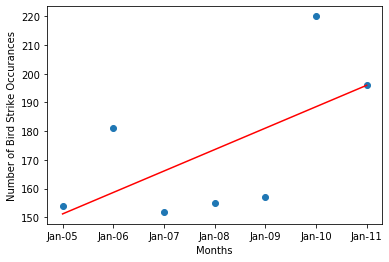

January 2012 Predicted Birdstrike: 205.91666666666669
January 2012 Actual Birdstrike: 323
Percent Error: 36.24871001031991%

January 2013 Predicted Birdstrike: 213.3809523809524
January 2013 Actual Birdstrike: 345
Percent Error: 38.15044858523118%

January 2014 Predicted Birdstrike: 220.8452380952381
January 2014 Actual Birdstrike: 346
Percent Error: 36.17189650426644%

January 2015 Predicted Birdstrike: 228.3095238095238
January 2015 Actual Birdstrike: 400
Percent Error: 42.92261904761905%

January 2016 Predicted Birdstrike: 235.77380952380952
January 2016 Actual Birdstrike: 486
Percent Error: 51.48687046835195%

Linear Regression Mean Error for January: 40.996108923157706%



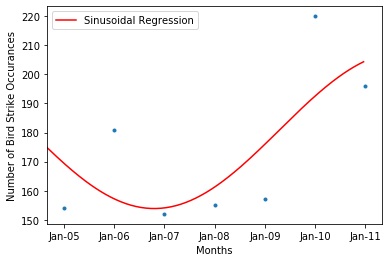

January 2012 Predicted Birdstrike: 207.74227710959335
January 2012 Actual Birdstrike: 323
Percent Error: 35.683505538825585%

January 2013 Predicted Birdstrike: 203.6987247364671
January 2013 Actual Birdstrike: 345
Percent Error: 40.95689138073417%

January 2014 Predicted Birdstrike: 190.85740638491365
January 2014 Actual Birdstrike: 346
Percent Error: 44.83889988875328%

January 2015 Predicted Birdstrike: 174.15853594311915
January 2015 Actual Birdstrike: 400
Percent Error: 56.460366014220206%

January 2016 Predicted Birdstrike: 160.02637526762388
January 2016 Actual Birdstrike: 486
Percent Error: 67.07276229061237%

Sinusoidal Regression Mean Error for January: 49.002485022629116%

*************************************************************************************************************************
********************************** Linear Regression for Bird Strikes in Spring Season **********************************
***************************************************************

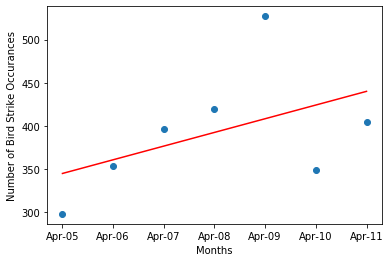

April 2012 Predicted Birdstrike: 566.8571428571429
April 2012 Actual Birdstrike: 809
Percent Error: 29.931131908882215%

April 2013 Predicted Birdstrike: 582.7142857142858
April 2013 Actual Birdstrike: 808
Percent Error: 27.88189533239037%

April 2014 Predicted Birdstrike: 598.5714285714287
April 2014 Actual Birdstrike: 911
Percent Error: 34.29512309863571%

April 2015 Predicted Birdstrike: 614.4285714285716
April 2015 Actual Birdstrike: 1094
Percent Error: 43.83651083833898%

April 2016 Predicted Birdstrike: 630.2857142857143
April 2016 Actual Birdstrike: 1024
Percent Error: 38.44866071428571%

Linear Regression Mean Error for April: 34.8786643785066%



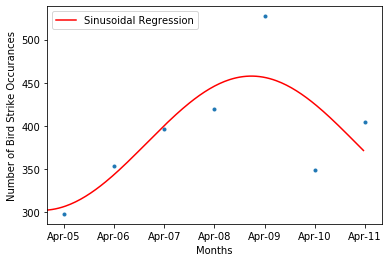

April 2012 Predicted Birdstrike: 333.77745809546997
April 2012 Actual Birdstrike: 809
Percent Error: 58.74197056916317%

April 2013 Predicted Birdstrike: 303.4833376612497
April 2013 Actual Birdstrike: 808
Percent Error: 62.4401809825186%

April 2014 Predicted Birdstrike: 314.4789009308216
April 2014 Actual Birdstrike: 911
Percent Error: 65.47981328970126%

April 2015 Predicted Birdstrike: 360.825157175648
April 2015 Actual Birdstrike: 1094
Percent Error: 67.01781013019671%

April 2016 Predicted Birdstrike: 417.48928366602325
April 2016 Actual Birdstrike: 1024
Percent Error: 59.22956214198991%

Sinusoidal Regression Mean Error for April: 62.58186742271393%

*************************************************************************************************************************
********************************** Linear Regression for Bird Strikes in Summer Season **********************************
******************************************************************************************

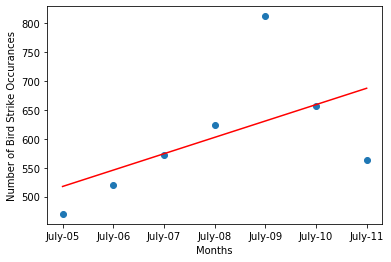

Linear Expression: y = 9.440476190476188 * x + 508.0238095238096

July 2012 Predicted Birdstrike: 1112.2142857142856
July 2012 Actual Birdstrike: 1522
Percent Error: 26.92415993992868%

July 2013 Predicted Birdstrike: 1140.5357142857142
July 2013 Actual Birdstrike: 1495
Percent Error: 23.70998566650741%

July 2014 Predicted Birdstrike: 1168.8571428571427
July 2014 Actual Birdstrike: 1899
Percent Error: 38.448807643120446%

July 2015 Predicted Birdstrike: 1197.1785714285713
July 2015 Actual Birdstrike: 1848
Percent Error: 35.21760977118121%

July 2016 Predicted Birdstrike: 1225.4999999999998
July 2016 Actual Birdstrike: 1657
Percent Error: 26.041038020519025%

Linear Regression Mean Error for July: 30.06832020825135%



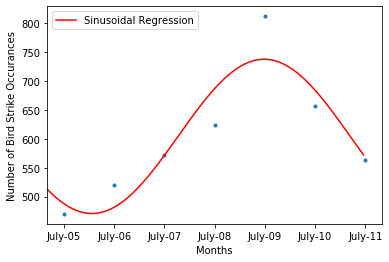


July 2012 Predicted Birdstrike: 500.88154251967376
July 2012 Actual Birdstrike: 1522
Percent Error: 67.09056882262328%

July 2013 Predicted Birdstrike: 474.2102221223198
July 2013 Actual Birdstrike: 1495
Percent Error: 68.28025270084818%

July 2014 Predicted Birdstrike: 549.1763842558773
July 2014 Actual Birdstrike: 1899
Percent Error: 71.08075912291325%

July 2015 Predicted Birdstrike: 667.1446573176938
July 2015 Actual Birdstrike: 1848
Percent Error: 63.899098629994924%

July 2016 Predicted Birdstrike: 735.845231417015
July 2016 Actual Birdstrike: 1657
Percent Error: 55.59171807984218%

Sinusoidal Regression Mean Error for July: 65.18847947124436%

***********************************************************************************************************************
********************************** Linear Regression for Bird Strikes in Fall Season **********************************
****************************************************************************************************

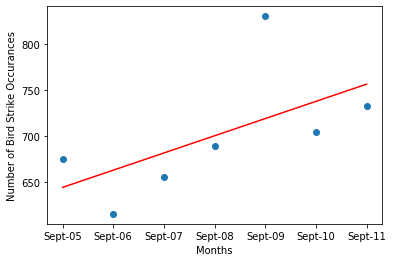

September 2012 Predicted Birdstrike: 1161.6190476190477
September 2012 Actual Birdstrike: 1488
Percent Error: 21.934203789042492%

September 2013 Predicted Birdstrike: 1180.3333333333335
September 2013 Actual Birdstrike: 1526
Percent Error: 22.651813018785486%

September 2014 Predicted Birdstrike: 1199.0476190476193
September 2014 Actual Birdstrike: 2065
Percent Error: 41.93473999769398%

September 2015 Predicted Birdstrike: 1217.761904761905
September 2015 Actual Birdstrike: 1816
Percent Error: 32.942626389762935%

September 2016 Predicted Birdstrike: 1236.4761904761908
September 2016 Actual Birdstrike: 1772
Percent Error: 30.221433946038896%

Linear Regression Mean Error for September: 29.936963428264754%



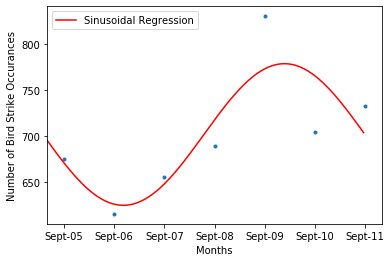

September 2012 Predicted Birdstrike: 654.2213118633025
September 2012 Actual Birdstrike: 1488
Percent Error: 56.03351398768128%

September 2013 Predicted Birdstrike: 624.5080639114907
September 2013 Actual Birdstrike: 1526
Percent Error: 59.07548729282499%

September 2014 Predicted Birdstrike: 662.8357072885369
September 2014 Actual Birdstrike: 2065
Percent Error: 67.90141853324276%

September 2015 Predicted Birdstrike: 735.2752907448602
September 2015 Actual Birdstrike: 1816
Percent Error: 59.51127253607598%

September 2016 Predicted Birdstrike: 777.7007976753935
September 2016 Actual Birdstrike: 1772
Percent Error: 56.111693133442806%

Sinusoidal Regression Mean Error for September: 59.72667709665357%



In [33]:
"""
This is the main method where it starts the program. 
"""
def main():
    print()
    print()
    print("**************************************************************************************")
    print("********************************** Bird Strike Data **********************************")
    print("**************************************************************************************")
    print()
    print(cleaning_data())
    print()
    
    print("***********************************************************************************")
    print("******************************** Top Five Airports ********************************")
    print("***********************************************************************************")
    print()
    print(topFiveAirports())
    print()
    print("********************************************************************************************")
    print("********************************** Bird Strikes By Season **********************************")
    print("********************************************************************************************")
    print()
    print(birdStrikesBySeason())
    print()
    
    print("*************************************************************************************************************************")
    print("********************************** Linear Regression for Bird Strikes in Winter Season **********************************")
    print("*************************************************************************************************************************")
    #print()
    #linearRegressionWinter()
    #print()
    linearRegressionJanuary()
    #print()
    #linearRegressionFebruary()
    #print()
    #linearRegressionDecember()
    print()
    sinusoidalRegressionJanuary()
    print()
    print("*************************************************************************************************************************")
    print("********************************** Linear Regression for Bird Strikes in Spring Season **********************************")
    print("*************************************************************************************************************************")
    #print()
    #linearRegressionSpring()
    #print()
    #linearRegressionMarch()
    print()
    linearRegressionApril()
    print()
    sinusoidalRegressionApril()
    print()
    #linearRegressionMay()
    #print()
    print("*************************************************************************************************************************")
    print("********************************** Linear Regression for Bird Strikes in Summer Season **********************************")
    print("*************************************************************************************************************************")
    #print()
    #linearRegressionSummer()
    #print()
    #linearRegressionJune()
    print()
    linearRegressionJuly()
    print()
    sinusoidalRegressionJuly()
    print()
    #linearRegressionAugust()
    #print()
    print("***********************************************************************************************************************")
    print("********************************** Linear Regression for Bird Strikes in Fall Season **********************************")
    print("***********************************************************************************************************************")
    print()
    linearRegressionSeptember()
    print()
    sinusoidalRegressionSeptember()
    print()
    #linearRegressionOctober()
    #print()
    #linearRegressionNovember()
    #print()

main() # This line starts the whole program.